TASK-1

1) Data Cleaning and Loading


In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/shuvish/Desktop/task1_oasis.csv')
print(df)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [3]:
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
# Check for missing values
df.isnull().sum()



Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

2) Descriptive Statistics

In [5]:
# Summary statistics for numerical columns
print(df.describe())



       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [9]:
# Mode for categorical columns
print('mode:',df['Total Amount'].mode())
# For mean
print('mean:',df['Total Amount'].mean())
# for median
print('median:',df['Total Amount'].median())
#for std deviation
print('std dev:',df['Total Amount'].std())


mode: 0    50
Name: Total Amount, dtype: int64
mean: 456.0
median: 135.0
std dev: 559.997631555123


3)Time Series Analysis

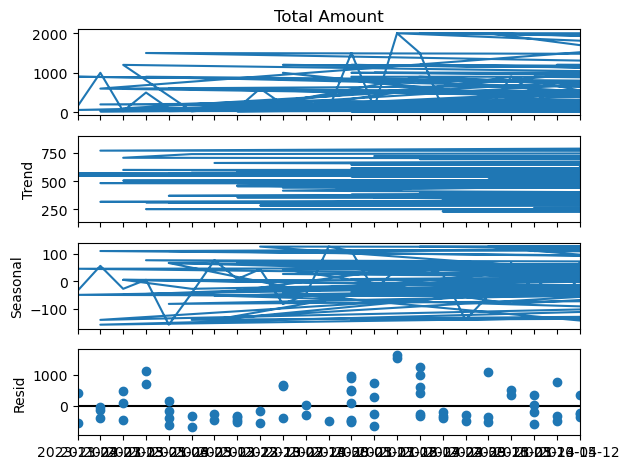

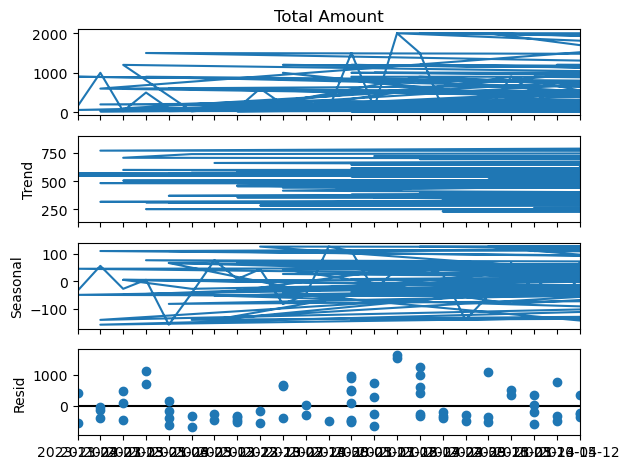

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Total Amount'], model='additive', period=20)
decomposition.plot()



4) Customer and Product Analysis

<Axes: xlabel='Gender'>

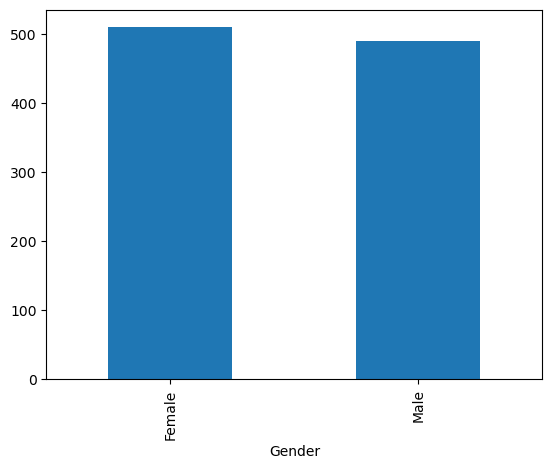

In [18]:
# Analyze customer age distribution
df['Age'].value_counts().plot(kind='bar')

# Gender distribution 
df['Gender'].value_counts().plot(kind='bar')


In [19]:
# Product sales
df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)


Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

In [20]:
# Top 10 customers by total spend
df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)


Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
CUST089    2000
CUST946    2000
CUST157    2000
CUST155    2000
CUST420    2000
Name: Total Amount, dtype: int64

5) Visualization

<Axes: >

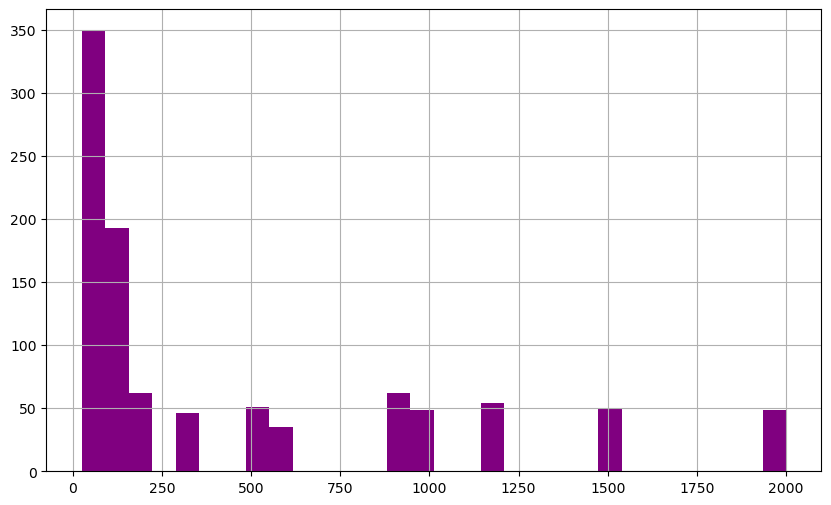

In [22]:
df['Total Amount'].hist(bins=30, figsize=(10, 6), color='purple')



<Axes: xlabel='Product Category'>

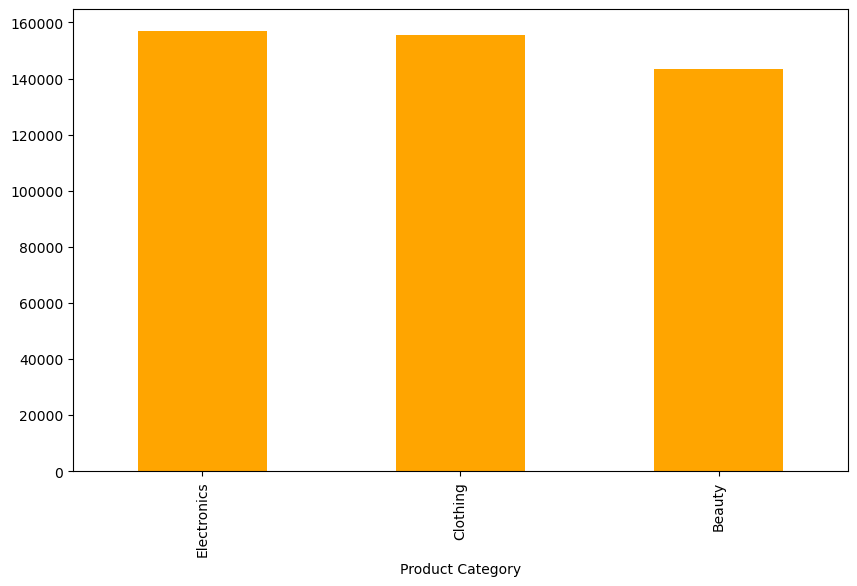

In [23]:
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10, 6), color='orange')


<Axes: ylabel='count'>

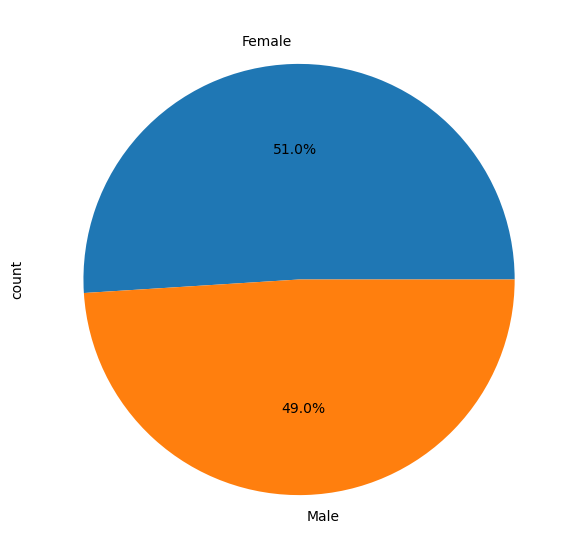

In [24]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))


Recommendations to Improve Business Performance
1. Sales Optimization
Identify Peak Sales Periods: Based on the analysis of sales trends over time, it’s clear that certain months or seasons experience a spike in sales. These peak periods could be tied to holidays, special events, or weather-related trends.
 Recommendation: To capitalize on these high-demand periods, we should consider increasing our marketing efforts during these times. This could include running targeted campaigns, offering time-limited discounts, or launching new products that align with seasonal demand. For instance, if sales peak during the holiday season, we should ramp up our digital and offline advertising starting in October to capture early holiday shoppers.

Product Promotions: Certain products may be underperforming or have slow-moving inventory. These could either be older products or items that haven't gained traction in the market. 
Recommendation: Offering discounts or running promotional campaigns on these products could help increase their visibility and move inventory faster. For example, bundling these underperforming products with best-sellers or creating special "flash sales" can help clear out stock while driving additional sales.

2. Customer Segmentation
Segment Customers Based on Demographics or Purchasing Behavior: We’ve observed that different customer segments behave differently in terms of purchasing habits, demographics (age, gender, location), and product preferences. 
Recommendation: By segmenting customers into groups (e.g., high-value, frequent buyers, first-time customers, or price-sensitive shoppers), we can tailor marketing efforts to each group. For example, younger customers may respond better to social media ads and influencer partnerships, while older customers may prefer email marketing with detailed product information or discounts. Personalized offers and recommendations will likely result in higher conversion rates.
3. Inventory Management
Adjust Inventory Based on Sales Data: The analysis of sales data reveals which products are consistently top sellers and which ones are struggling. 
Recommendation: For the high-demand products, ensure inventory is replenished in time to avoid stockouts. On the flip side, for slow-moving products, it might be worth considering a sale or discontinuing them altogether to free up shelf space. We could also introduce dynamic pricing strategies where prices for popular products increase during peak demand periods, while discounts on less popular items encourage more purchases.
4. Customer Retention
Encourage Repeat Purchases Through Loyalty Programs: We’ve identified a group of high-spending or repeat customers who are likely to bring in significant long-term revenue. 
Recommendation: We should launch a customer loyalty program to reward these loyal shoppers with points, exclusive offers, or early access to sales. This not only increases customer retention but also boosts lifetime value (LTV). Personalized offers based on their past purchases could encourage them to buy more frequently or at higher volumes. Additionally, recognizing and thanking these customers—whether through email, social media shoutouts, or personalized discounts—can help build brand loyalty.

In Summary:
To drive growth and improve business performance, I recommend:

Optimizing sales by aligning marketing and promotional efforts with seasonal peaks and underperforming products.
Targeting marketing campaigns based on detailed customer segments to ensure we meet the needs of diverse buyer groups.
Streamlining inventory management by restocking popular items while optimizing slower-moving products.
Fostering customer retention with loyalty programs and personalized offers for high-value customers, ensuring they continue to come back.
By implementing these strategies, we can expect to increase sales, enhance customer satisfaction, and improve overall profitability.

